<a href="https://colab.research.google.com/github/mahmoudsoroor/ZTechnium-Internship-NLP-/blob/main/key_phrase_extraction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install trafilatura
!pip install summa
!pip install git+https://github.com/smirnov-am/pytopicrank.git
!pip install git+https://github.com/LIAAD/yake
!pip install keyBERT
!pip install git+https://github.com/boudinfl/pke.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.9 MB/s 
     |████████████████████████████████| 837 kB 36.7 MB/s 
     |████████████████████████████████| 139 kB 34.0 MB/s 
     |████████████████████████████████| 412 kB 35.9 MB/s 
     |████████████████████████████████| 288 kB 51.5 MB/s 
     |████████████████████████████████| 749 kB 42.7 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!pip install -U spacy
!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")
! pip install flashtext

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-08-17 01:07:19.361691: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 6.7 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=9ba06f8172dc3513f6e9bb41b34dae48e9b3207987efc77dceeb99fd8a439f54
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext


In [3]:
import trafilatura
import pandas as pd
import numpy as np
import unicodedata
from spacy import displacy
import nltk
from nltk.stem import PorterStemmer , SnowballStemmer ,LancasterStemmer , WordNetLemmatizer
from nltk.tokenize import sent_tokenize , word_tokenize
import re
import os
import string
import pke
from sklearn.feature_extraction.text import TfidfVectorizer

#read text

In [4]:
array_link = "https://en.wikipedia.org/wiki/Machine_learning"

array_text = []

html = trafilatura.fetch_url(array_link)
text = trafilatura.extract(html)
text_clean = text.replace("\n", " ").replace("\'", "")
array_text.append(text_clean[0:2000])

In [5]:
array_text

['Machine learning |Part of a series on| |Machine learning| and data mining |Part of a series on| |Artificial intelligence| Machine learning (ML) is a field of inquiry devoted to understanding and building methods that learn, that is, methods that leverage data to improve performance on some set of tasks.[1] It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so.[2] Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, speech recognition, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.[3] A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers, but not all machine learning is statistical learning. The study of mathematica

# preprocessing

In [6]:
def remove_non_ascii(text):
    #Remove non-ASCII characters from list of tokenized words
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def to_lowercase(text):
    return text.lower()


def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()

In [7]:
def clean_text( text):
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    text = remove_whitespaces(text)

    return text

In [9]:
text = clean_text(array_text[0])

In [10]:
text

'machine learning part of a series on machine learning and data mining part of a series on artificial intelligence machine learning ml is a field of inquiry devoted to understanding and building methods that learn that is methods that leverage data to improve performance on some set of tasks it is seen as a part of artificial intelligence machine learning algorithms build a model based on sample data known as training data in order to make predictions or decisions without being explicitly programmed to do so machine learning algorithms are used in a wide variety of applications such as in medicine email filtering speech recognition and computer vision where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks a subset of machine learning is closely related to computational statistics which focuses on making predictions using computers but not all machine learning is statistical learning the study of mathematical optimization delivers methods theo

# keyphrase extraction model

In [11]:
extractor = pke.unsupervised.TfIdf()
extractor.load_document(input=text, language='en')
extractor.candidate_selection()
extractor.candidate_weighting()
keyphrases = extractor.get_n_best(n=20)
keyphrases


[('machine learning', 33.109824974298846),
 ('machine', 19.290087688441204),
 ('learning', 19.09527741609624),
 ('artificial intelligence machine', 14.359818180029869),
 ('intelligence machine', 14.359818180029869),
 ('intelligence machine learning', 14.359818180029869),
 ('morning', 11.189893178587557),
 ('learning algorithms', 10.438408115621527),
 ('artificial intelligence', 9.715961990255146),
 ('data mining', 9.189893178587557),
 ('machine learning algorithms', 9.189893178587557),
 ('machine learning ml', 7.1799090900149345),
 ('learning ml', 7.1799090900149345),
 ('inquiry', 7.1799090900149345),
 ('inquiry devoted', 7.1799090900149345),
 ('building methods', 7.1799090900149345),
 ('leverage data', 7.1799090900149345),
 ('learning algorithms build', 7.1799090900149345),
 ('algorithms build', 7.1799090900149345),
 ('sample data known', 7.1799090900149345)]

In [13]:
extractor = pke.unsupervised.KPMiner()
extractor.load_document(input=text, language='en')
extractor.candidate_selection()
extractor.candidate_weighting()
keyphrases = extractor.get_n_best(n=20)
keyphrases

[('machine learning', 188.86282606343636),
 ('learning algorithms', 51.50804347184627),
 ('machine', 19.290087688441204),
 ('learning', 19.09527741609624),
 ('field', 4.355965906355206),
 ('predictions', 4.275064763554398),
 ('data', 3.1639204481621475),
 ('tasks', 2.5201772613909292),
 ('algorithms', 1.6096404744368118),
 ('methods', 1.1956481294708245),
 ('applications', 1.1956481294708245),
 ('performance', 0.5060455037750411),
 ('computer', 0.1210732128484229),
 ('working', 0.12064788204100947)]

In [14]:
extractor = pke.unsupervised.YAKE()
extractor.load_document(input=text, language='en')
extractor.candidate_selection()
extractor.candidate_weighting()
keyphrases = extractor.get_n_best(n=20)
keyphrases

[('artificial intelligence machine', 0.00021148574214994686),
 ('intelligence machine learning', 0.00021944131337652543),
 ('machine learning algorithms', 0.0002541013136219915),
 ('machine learning use', 0.0005079228305844229),
 ('machine learning programs', 0.0005079228305844229),
 ('problems machine learning', 0.000507922830584423),
 ('exist machine learning', 0.000507922830584423),
 ('business problems machine', 0.0005357703184937467),
 ('swans exist machine', 0.0005357703184937467),
 ('machine learning', 0.0005368753351052364),
 ('analytics overviewedit learning', 0.0005935859843943558),
 ('learning algorithms build', 0.0005939132622082895),
 ('overviewedit learning algorithms', 0.0005939132622082895),
 ('learning algorithms work', 0.0005939132622082895),
 ('learning data mining', 0.0006100888010172769),
 ('optimization delivers methods', 0.0006250543870677826),
 ('delivers methods theory', 0.0006250543870677826),
 ('medicine email filtering', 0.000626158894995047),
 ('email filte

In [15]:
extractor = pke.unsupervised.TextRank()
extractor.load_document(input=text, language='en')
extractor.candidate_selection()
extractor.candidate_weighting()
keyphrases = extractor.get_n_best(n=20)
keyphrases

[('machine learning data mining', 0.1374060683997603),
 ('artificial intelligence machine learning algorithms', 0.11657546139165854),
 ('predictive analytics overviewedit learning algorithms',
  0.10966107702620631),
 ('artificial intelligence machine learning ml', 0.10811676417357585),
 ('business problems machine learning', 0.09904756580383649),
 ('machine learning algorithms', 0.08835221524928025),
 ('medicine email filtering speech recognition', 0.08326494668419374),
 ('machine learning programs', 0.07989602803119755),
 ('data mining part', 0.07670032901331264),
 ('machine learning', 0.07082201966145818),
 ('exploratory data analysis', 0.06732601009547594),
 ('training data', 0.05790460395769888),
 ('sample data', 0.05790456395769888),
 ('undiscovered black swans', 0.04996130801051624),
 ('data', 0.048483957819921826),
 ('applications such', 0.04323977649974891),
 ('methods theory', 0.03697769963036284),
 ('computational statistics', 0.03697746963036284),
 ('computer vision', 0.036

In [16]:
extractor = pke.unsupervised.SingleRank()
extractor.load_document(input=text, language='en')
extractor.candidate_selection()
extractor.candidate_weighting()
keyphrases = extractor.get_n_best(n=20)
keyphrases

[('machine learning data mining', 0.18329424980255596),
 ('artificial intelligence machine learning algorithms', 0.18113167333798671),
 ('artificial intelligence machine learning ml', 0.16183587186626244),
 ('machine learning algorithms', 0.15376592808360057),
 ('business problems machine learning', 0.14258754486072647),
 ('machine learning programs', 0.13507165209759128),
 ('machine learning', 0.1266996425801715),
 ('predictive analytics overviewedit learning algorithms',
  0.12380058160864929),
 ('data mining part', 0.07477979278522803),
 ('machine', 0.06195633910369719),
 ('exploratory data analysis', 0.057137023767568185),
 ('medicine email filtering speech recognition', 0.05428932426385029),
 ('sample data', 0.049446104036410796),
 ('applications such', 0.04851703210206553),
 ('training data', 0.04830877025872421),
 ('data', 0.041279603778193064),
 ('conventional algorithms', 0.03408966414788321),
 ('obvious such', 0.03340977511510168),
 ('application domains', 0.03271523127435755

In [17]:
extractor = pke.unsupervised.TopicalPageRank()
extractor.load_document(input=text, language='en')
extractor.candidate_selection()
extractor.candidate_weighting()
keyphrases = extractor.get_n_best(n=20)
keyphrases

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  % sorted(inconsistent)


[('machine learning data mining', 0.21875727657977034),
 ('artificial intelligence machine learning algorithms', 0.20268588613268768),
 ('artificial intelligence machine learning ml', 0.18122219687207405),
 ('machine learning algorithms', 0.17361532526810258),
 ('business problems machine learning', 0.15997914235790106),
 ('machine learning programs', 0.1507213108303281),
 ('machine learning', 0.1451332826626964),
 ('predictive analytics overviewedit learning algorithms',
  0.13593331138841036),
 ('data mining part', 0.09446123810437516),
 ('machine', 0.06903315645785296),
 ('exploratory data analysis', 0.06557680377566732),
 ('sample data', 0.061430544963314834),
 ('training data', 0.058756129299169214),
 ('medicine email filtering speech recognition', 0.05357322089204907),
 ('data', 0.049545106370908275),
 ('related field', 0.037110018630531066),
 ('application domains', 0.036130505897908324),
 ('conventional algorithms', 0.0347619552355416),
 ('computational statistics', 0.033019080

In [19]:
extractor = pke.unsupervised.TopicRank()
extractor.load_document(input=text, language='en')
extractor.candidate_selection()
extractor.candidate_weighting()
keyphrases = extractor.get_n_best(n=20)
keyphrases

[('machine', 0.11998168979181759),
 ('data', 0.06493566328881557),
 ('field', 0.041585018374087644),
 ('building methods', 0.03932159803924472),
 ('computer vision', 0.03800550634105161),
 ('tasks', 0.03407884430321972),
 ('study', 0.03127798362874932),
 ('application domains', 0.030476928800879894),
 ('conventional algorithms', 0.02880806361234956),
 ('predictions', 0.02846645435009133),
 ('inferences', 0.02675833046333593),
 ('morning', 0.020999626933940224),
 ('series', 0.019651145904683517),
 ('mathematical optimization', 0.018812167718841255),
 ('neural networks', 0.01821553245679771),
 ('implementations', 0.0179985627733325),
 ('unsupervised', 0.017698779727656634),
 ('statistical', 0.017349813940613155),
 ('subset', 0.01708224045528544),
 ('unfeasible', 0.01662525747384483)]

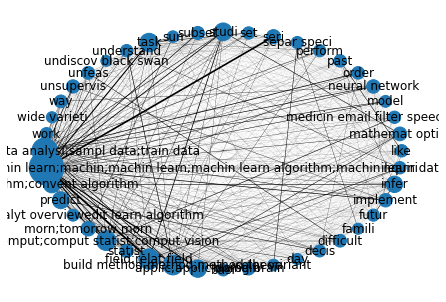

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

labels = {i: ';'.join(topic) for i, topic in enumerate(extractor.topics)}
edge_weights = [extractor.graph[u][v]['weight'] for u,v in extractor.graph.edges()]
sizes = [10e3*extractor._w[i] for i, topic in enumerate(extractor.topics)]
nx.draw_shell(extractor.graph, with_labels=True, labels=labels, width=edge_weights, node_size=sizes)